In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

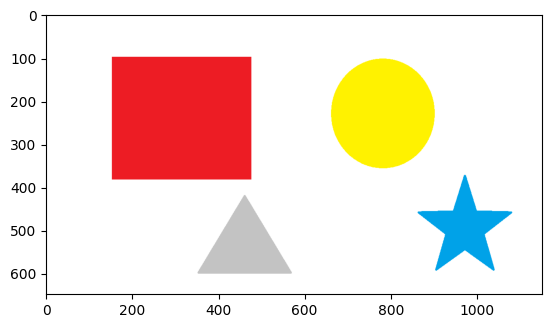

In [3]:
image = cv2.imread('E:/python/Images for opencv/shapes.png')
original_image = image.copy()
image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [4]:
grey = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(grey , 50 , 200)
contours , hierarchy = cv2.findContours(edged.copy() , cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_NONE)
print("number of contours found : ", len(contours))


number of contours found :  4


In [5]:
def x_cord_contour(contours):
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
    return (int(M['m10'])/(M['m00']))

In [6]:
def label_contour_center(image , contour):
    M = cv2.moments(contour)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])

    cv2.circle(image , (cx , cy) , 10 , (0 , 0 ,255) , -1)
    return image

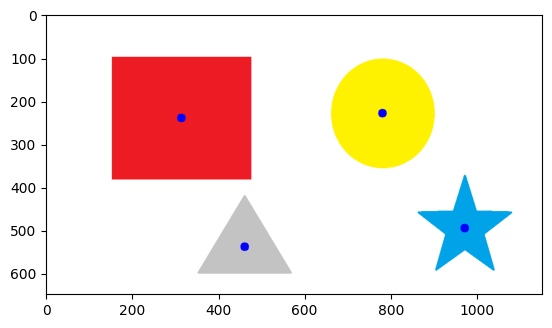

In [7]:
for c in contours : 
    orig = label_contour_center(image , c)

plt.imshow(image)

In [8]:
contours_left2right = sorted(contours , key=x_cord_contour , reverse=False)
for(i , c) in enumerate(contours) :
    cv2.drawContours(original_image , [c] , -1 , (85 , 100 , 150) , 2 )
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv2.putText(original_image , str(i + 1) , (cx , cy) , cv2.FONT_HERSHEY_SIMPLEX ,1,(255 , 255 , 0),2)
    cv2.imshow("left2right contours" , original_image)
    cv2.waitKey(0)

cv2.destroyAllWindows()

cropping contour

In [12]:
i = 1
for c in contours :
    cv2.drawContours(original_image , [c] , -1 , (85 , 100 , 150) , 2 )
    (x , y , w , h) = cv2.boundingRect(c)
    cropped = original_image[y:y+h, x:x+w]
    image_name = "contour No . " + str(i)
    cv2.imshow("image_name", cropped)
    cv2.waitKey(0)
    i = i + 1
cv2.destroyAllWindows()